In [25]:
### Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
from plot_indicators import plot_function


In [26]:
### Load in Stock Data
def import_stock_data(tickers, start_date):
    # Check if tickers is a list or a single ticker string
    if isinstance(tickers, list):
        data = yf.download(tickers, start = start_date)[['Close', 'High', 'Low']]
    else:
        data = yf.download(tickers, start = start_date)[['Close', 'High', 'Low']]
        data = pd.DataFrame(data)

    # Reset index to make 'Date' a column instead of index
    data.reset_index(inplace = True)
    data['Date'] = pd.to_datetime(data['Date'])

    return data

tickers = ['AAPL', 'GOOG']
start_date = '2024-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data

[*********************100%%**********************]  2 of 2 completed


Price        Date       Close                    High                     Low  \
Ticker                   AAPL        GOOG        AAPL        GOOG        AAPL   
0      2024-01-02  185.639999  139.559998  188.440002  140.615005  183.889999   
1      2024-01-03  184.250000  140.360001  185.880005  141.089996  183.429993   
2      2024-01-04  181.910004  138.039993  183.089996  140.634995  180.880005   
3      2024-01-05  181.179993  137.389999  182.759995  138.809998  180.169998   
4      2024-01-08  185.559998  140.529999  185.600006  140.639999  181.500000   
..            ...         ...         ...         ...         ...         ...   
73     2024-04-17  168.000000  156.880005  170.649994  158.681000  168.000000   
74     2024-04-18  167.039993  157.460007  168.639999  158.485001  166.550003   
75     2024-04-19  165.000000  155.720001  166.399994  157.990005  164.080002   
76     2024-04-22  165.839996  157.949997  167.259995  159.184998  164.770004   
77     2024-04-23  166.899994  159.919998  167.050003  160.479996  164.929993   

Price               
Ticker        GOOG  
0       137.740005  
1       138.429993  
2       138.009995  
3       136.850006  
4       137.880005  
..             ...  
73      156.134995  
74      156.210007  
75      153.910004  
76      155.660004  
77      157.964996  

[78 rows x 7 columns]

In [27]:
### Compute RSI for Multiple Tickers 
def calculate_rsi(data, periods, tickers):
    rsi_df = pd.DataFrame(index = data.index)
    rsi_vals = {}

    for t in tickers:
        # Calculate price changes for each ticker
        data[f'{t}_Price Change'] = data['Close'][t].diff()
        # Separate gains and losses
        data[f'{t}_Gain'] = data[f'{t}_Price Change'].apply(lambda x: x if x > 0 else 0)
        data[f'{t}_Loss'] = data[f'{t}_Price Change'].apply(lambda x: abs(x) if x < 0 else 0)
        # Calculate average gains and losses over the period
        data[f'{t}_Avg Gain'] = data[f'{t}_Gain'].rolling(window = periods).mean()
        data[f'{t}_Avg Loss'] = data[f'{t}_Loss'].rolling(window = periods).mean()
        # Calculate RS (Relative Strength)
        data[f'{t}_RS'] = data[f'{t}_Avg Gain'] / data[f'{t}_Avg Loss']
        # Calculate RSI using the formula: RSI = 100 - (100 / (1 + RS))
        data[f'{t}_RSI'] = 100 - (100 / (1 + data[f'{t}_RS']))
        # Append RSI column to the DataFrame
        rsi_df[t] = data[f'{t}_RSI']
        # Append last RSI value to rsi_vals dictionary
        rsi_vals[t] = data[f'{t}_RSI'].iloc[-1]

    return rsi_df, rsi_vals

# Call the function to calculate RSI for multiple tickers
rsi_df, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers)
print(rsi_df.tail(5))
print("RSI values list: ", rsi_vals)

         AAPL       GOOG
73  40.661275  59.648451
74  41.944842  60.054167
75  41.065720  48.330481
76  44.604314  54.166674
77  45.098037  56.715865
RSI values list:  {'AAPL': 45.09803708240946, 'GOOG': 56.715864708752015}


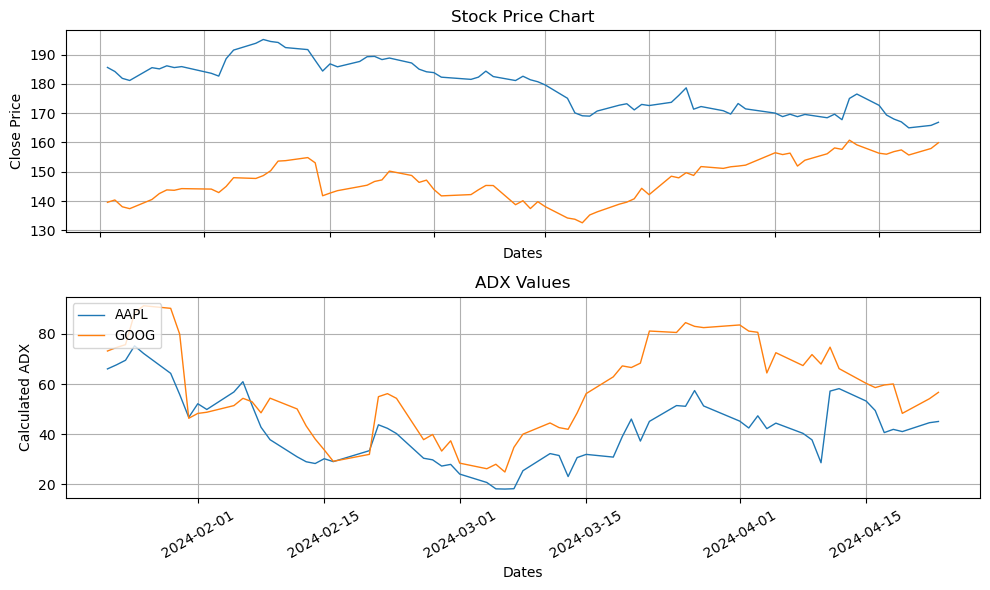

In [28]:
### Plot RSI
plot = plot_function(stock_data, rsi_df, tickers = ['AAPL', 'GOOG'])
plot
